In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Data Jar**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# Updated Kaggle path for the standard MNIST dataset
KAGGLE_FILE_PATH = "/kaggle/input/mnist-dataset/mnist.npz"

def load_and_preprocess_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
    
    # Normalize images to [0, 1] range
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_and_preprocess_data(KAGGLE_FILE_PATH)
print("Data loaded and normalized successfully.")


2026-01-08 11:05:43.172841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767870343.426343      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767870343.501302      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Data loaded and normalized successfully.


**Model Jar**

In [2]:
def build_mnist_model():
    return keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

model = build_mnist_model()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2026-01-08 11:07:06.772770: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Task Jar**

In [4]:
def compile_model(model):
    model.compile(
        optimizer='sgd',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = compile_model(model)


**Learning and Accuracy Jar**

In [5]:
print("Starting training...")
model.fit(x_train, y_train, epochs=2)

print("\nStarting evaluation...")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")


Starting training...
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7213 - loss: 1.0586
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9024 - loss: 0.3522

Starting evaluation...
Test Accuracy: 92.10%


**Prediction**

In [6]:
print("Making predictions for the first 5 images:")
predictions = model.predict(x_test[:5])
predicted_digits = np.argmax(predictions, axis=1)

print("Predicted digits:", predicted_digits)
print("True labels:     ", y_test[:5])
# print(predictions) # Uncomment to see raw probability distributions


Making predictions for the first 5 images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted digits: [7 2 1 0 4]
True labels:      [7 2 1 0 4]


**Save Jar**

In [7]:
import pickle

# Saving the model object as a pickle file in /kaggle/working/
pickle_file_path = "mnist_model.pkl"
with open(pickle_file_path, "wb") as f:
    pickle.dump(model, f)

print(f"Model successfully saved as {pickle_file_path}")

# To reload later:
# with open(pickle_file_path, "rb") as f:
#     loaded_model = pickle.load(f)


Model successfully saved as mnist_model.pkl


**Loaded the Pickle Model**

In [12]:
import pickle
import numpy as np
import tensorflow as tf

with open("mnist_model.pkl", "rb") as f:
        loaded_model = pickle.load(f)
        print("Model loaded successfully from pickle file.")

Model loaded successfully from pickle file.


Performed test dataset

In [13]:
# Verify model performance
loss, acc = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Loaded Model Test Accuracy: {acc*100:.2f}%")


Loaded Model Test Accuracy: 92.10%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


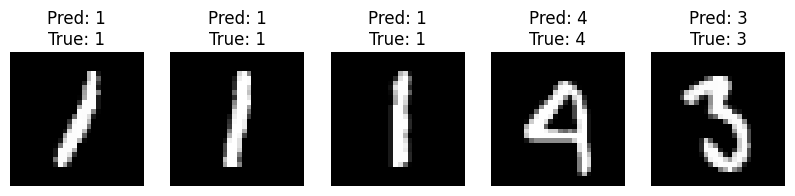

In [14]:

import matplotlib.pyplot as plt

# Pick 5 random images from the test set
indices = np.random.choice(range(len(x_test)), 5)
test_images = x_test[indices]
test_labels = y_test[indices]

# Make predictions
predictions = loaded_model.predict(test_images)
predicted_digits = np.argmax(predictions, axis=1)

# Display results
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')
plt.show()



Size of Model

In [15]:
import os

file_path = 'mnist_model.pkl'
file_size_bytes = os.path.getsize(file_path)

# Convert to human-readable format
file_size_kb = file_size_bytes / 1024
file_size_mb = file_size_kb / 1024

print(f"Model File Size: {file_size_bytes} Bytes")
print(f"Model File Size: {file_size_kb:.2f} KB")
print(f"Model File Size: {file_size_mb:.2f} MB")


Model File Size: 427615 Bytes
Model File Size: 417.59 KB
Model File Size: 0.41 MB
